# import libraries needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# import local dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')

# data cleanse

In [3]:
#View top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**change data type**

In [7]:
df.convert_dtypes().dtypes

show_id         string
type            string
title           string
director        string
cast            string
country         string
date_added      string
release_year     Int64
rating          string
duration        string
listed_in       string
description     string
dtype: object

**cleanse listed_in column，extract the first word**

In [5]:
#Cleaning - 'listed_in' column
a = []
for item in df['listed_in']:
    a.append(item.split()[0])


**create a new column and fill with the data above**

In [6]:
df['categories'] = a

In [7]:
df['categories'] = df['categories'].str.lstrip().str.rstrip().replace(",", "", regex=True).replace("'","",regex=True)

**delete columns not needed**

In [8]:
df = df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'categories']]

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


**observe show release year distribution**

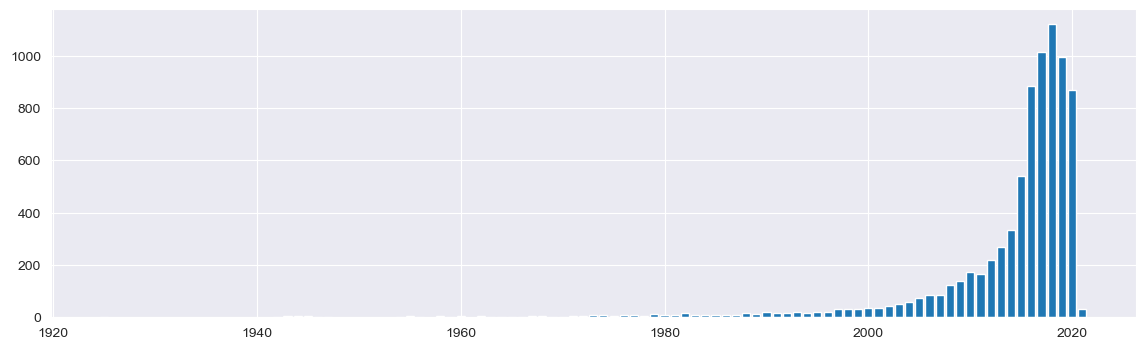

In [14]:
data = df['release_year'].value_counts()
fig,ax=plt.subplots(figsize=(14,4))
ax.bar(data.index, data.values)
plt.show()

Since 2000, the number of shows released has changed significantly, so this study will focus on the period of 2000-2020.

<br>

In [16]:
df = df.loc[(df['release_year'] <= 2020) & (df['release_year'] >= 2000)]

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


<br>

# data analysis

 trend of new show released

In [16]:
df_tv = df.loc[df['type'] == 'TV Show']['release_year'].value_counts()
df_mv = df.loc[df['type'] == 'Movie']['release_year'].value_counts()

**tv and mv new table**

In [18]:
pd.concat([df_tv, df_mv], axis=1, keys=['tv', 'mv']).T

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1965,1956,1942,1969,1954,1970,1966,1964,1947,1959
tv,457.0,414.0,387.0,268.0,240.0,159.0,90.0,65.0,61.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mv,411.0,582.0,734.0,744.0,642.0,382.0,244.0,202.0,158.0,127.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0


**trends in the number of tv& movie in each year**

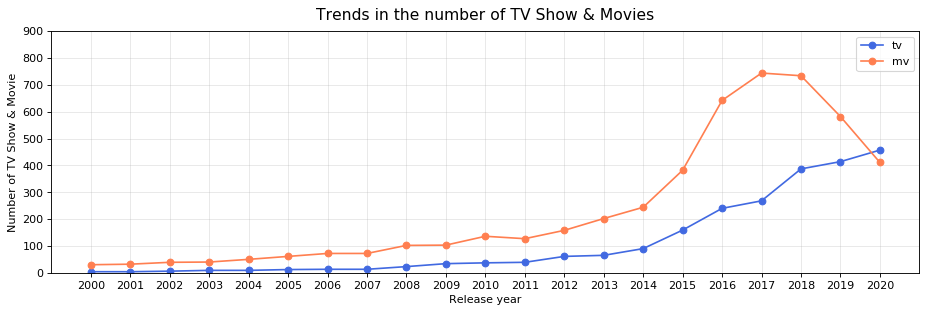

In [45]:
data = pd.concat([df_tv, df_mv], axis=1, keys=['tv', 'mv'])
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.plot(data.index, data['tv'], label='tv', marker='o', color='royalblue')
ax.plot(data.index, data['mv'], label='mv', marker='o', color='coral')
ax.legend()
ax.set_xticks(np.arange(2000, 2021,1))
ax.grid(alpha=0.3)
ax.set_ylim(0,900)
ax.set_title('Trends in the number of TV Show & Movies', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of TV Show & Movie')
plt.show()

**Number of TV and MV Released**

In [30]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

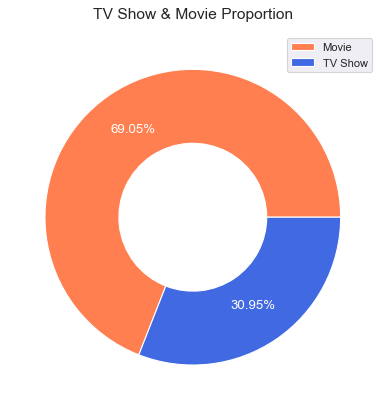

In [29]:
data = df['type'].value_counts()
fig,ax=plt.subplots(figsize=(6, 6), dpi=80)
ax.pie(data, labels=data.index, autopct='%1.2f%%', pctdistance=0.72, colors=['coral', 'royalblue'],
       wedgeprops={'width':0.5, 'edgecolor':'white'}, textprops={'fontsize':12, 'color':'white'})
ax.legend(bbox_to_anchor=(1,0,0,1))

ax.set_title('TV Show & Movie Proportion', y=1.02, fontsize=14)
plt.show()

Conclusion: in the past 20 years, 2 times more movies were produced and released on Netflix than tv shows.

## Rating Analysis

In [33]:
tv_rating = df.loc[df['type'] == 'TV Show']['rating'].value_counts()

In [34]:
mv_rating = df.loc[df['type'] == 'Movie']['rating'].value_counts()

**conbine 2 ratings tables**

In [35]:
pd.concat([tv_rating, mv_rating], axis=1, keys=['tv', 'mv']).fillna(0).astype('int32')

,tv,mv
TV-MA,1018,1845
TV-14,659,1272
TV-PG,301,505
TV-Y7,176,95
TV-Y,163,117
TV-G,83,111
NR,5,79
R,2,663
TV-Y7-FV,1,5
PG-13,0,386


**Visualize Rating Distribution for TV and Movie**

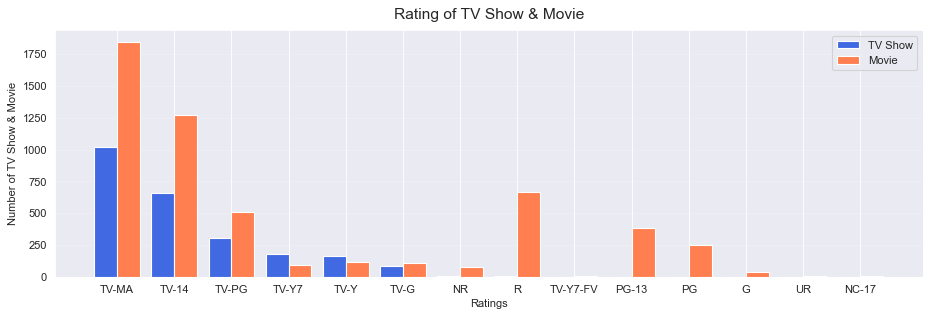

In [37]:
data = pd.concat([tv_rating, mv_rating], axis=1, keys=['tv', 'mv']).fillna(0).astype('int32')
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.bar(np.arange(0,len(data.index))-0.2, data['tv'], width=0.4, label='TV Show', color='royalblue')
ax.bar(np.arange(0,len(data.index))+0.2, data['mv'], width=0.4, label='Movie', color='coral')
ax.set_xticks(np.arange(0,len(data)))
ax.set_xticklabels(data.index)
ax.set_title('Rating of TV Show & Movie', y=1.02, fontsize=14)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of TV Show & Movie')
ax.yaxis.grid(alpha=0.3, ls='--')
ax.legend()
plt.show()

There is no R-rated TV show

## Analyze Rating Distribution

**Create tables for mv and tv**

In [40]:
table_tv = df.loc[df['type'] == 'TV Show']
table_mv = df.loc[df['type'] == 'Movie']

**movie ratings in the past 20 years**

In [41]:
pd.DataFrame(table_mv['rating'].value_counts()).T

,TV-MA,TV-14,R,TV-PG,PG-13,PG,TV-Y,TV-G,TV-Y7,NR,G,TV-Y7-FV,UR,NC-17
rating,1845,1272,663,505,386,247,117,111,95,79,39,5,5,3


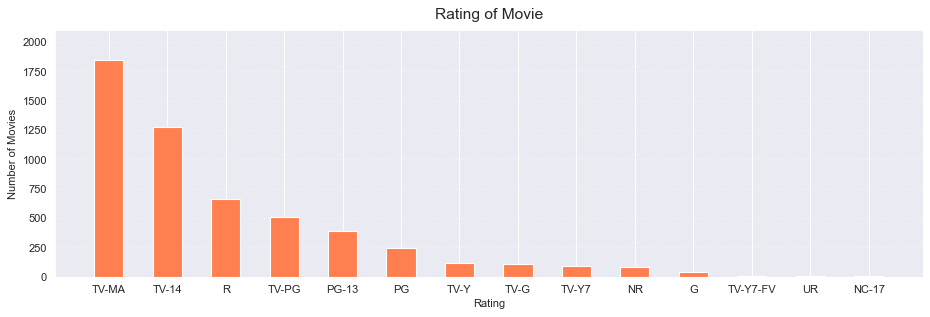

In [45]:
data = pd.DataFrame(table_mv['rating'].value_counts())
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.bar(data.index, data['rating'], color='coral', width=0.5)
ax.yaxis.grid(alpha=0.3, ls='--')
ax.set_ylim(0,2100)
ax.set_title('Rating of Movie', y=1.02, fontsize=14)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of Movies')
plt.show()

From the above, we can conclude that the number of TV-MA、TV-14、R rated movies are comparatively larger（500+）

**Rating,Year and Quantity**

In [47]:
pivot_mv = pd.DataFrame(table_mv.groupby(['rating', 'release_year']).size())
pivot_mv

0
rating   release_year   
G        1956          1
         1958          1
         1968          1
         1969          1
         1971          2
...                   ..
TV-Y7-FV 2018          1
UR       1974          1
         2007          2
         2008          1
         2016          1

[395 rows x 1 columns]

**convert the above to a pivot table**

In [67]:
t_mv = pd.pivot_table(pivot_mv, index=['release_year'], columns=['rating']).fillna(0).astype('int32')[0]
t_mv

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
release_year,,,,,,,,,,,,,,
2000,2,0,0,4,8,7,5,0,1,3,0,0,0,0
2001,2,0,1,3,4,12,5,0,1,3,0,1,0,0
2002,0,0,0,4,13,10,6,0,5,1,0,0,0,0
2003,0,0,0,5,7,10,9,0,7,1,1,0,0,0
2004,3,0,1,8,6,5,10,0,9,8,0,0,0,0
2005,2,0,0,4,12,10,22,0,2,9,0,0,0,0
2006,0,0,1,8,12,8,20,0,12,10,0,1,0,0
2007,1,0,2,10,13,13,14,0,11,5,1,0,0,2
2008,0,0,0,8,21,16,26,1,19,7,1,2,0,1


<br>

**The trend of tv/mv release with respect to rating**

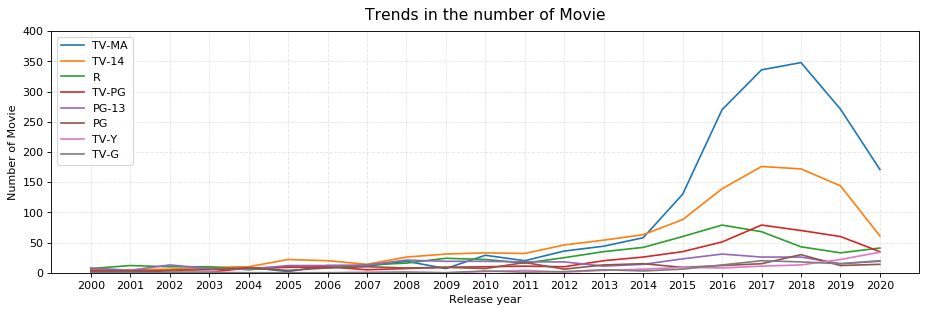

In [78]:
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.plot(t_mv.index, t_mv['TV-MA'].values, label='TV-MA')
ax.plot(t_mv.index, t_mv['TV-14'].values, label='TV-14')
ax.plot(t_mv.index, t_mv['R'].values, label='R')
ax.plot(t_mv.index, t_mv['TV-PG'].values, label='TV-PG')
ax.plot(t_mv.index, t_mv['PG-13'].values, label='PG-13')
ax.plot(t_mv.index, t_mv['PG'].values, label='PG')
ax.plot(t_mv.index, t_mv['TV-Y'].values, label='TV-Y')
ax.plot(t_mv.index, t_mv['TV-G'].values, label='TV-G')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend(loc='upper left')
ax.set_ylim(0,400)
ax.grid(alpha=0.3, ls='--')
ax.set_title('Trends in the number of Movie', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of Movie')
plt.show()

Before 2014, the number of films in various rating categories remained relatively stable. Starting from 2015, there was a significant increase in the production of films with ratings such as TV-MA, TV-14, R, and TV-PG. However, from 2019, the production of films in these categories began to decline.

**the number of tv shows released based on rating**

In [80]:
pd.DataFrame(table_tv['rating'].value_counts()).T

,TV-MA,TV-14,TV-PG,TV-Y7,TV-Y,TV-G,NR,R,TV-Y7-FV
rating,1005,641,292,165,159,72,5,2,1


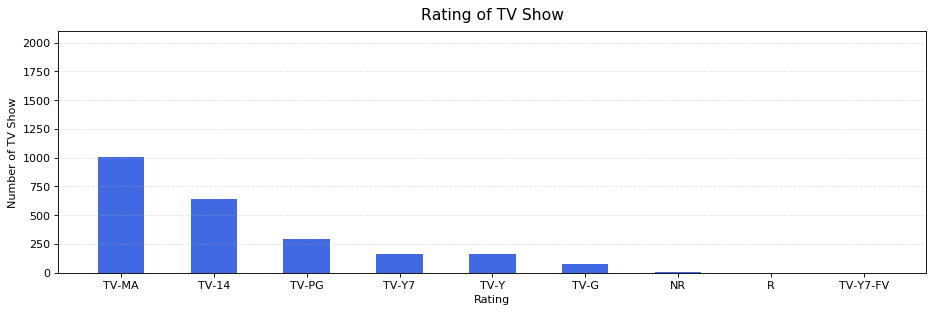

In [83]:
data = pd.DataFrame(table_tv['rating'].value_counts())
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.bar(data.index, data['rating'], color='royalblue', width=0.5)
ax.yaxis.grid(alpha=0.3, ls='--')
ax.set_ylim(0,2100)
ax.set_title('Rating of TV Show', y=1.02, fontsize=14)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of TV Show')
plt.show()

 From the graph, it can be observed that there are more than 500 films in the TV-MA and TV-14 rating categories.

**TV's Rating,Year and Quantity**

In [86]:
pivot_tv = pd.DataFrame(table_tv.groupby(['rating', 'release_year']).size())
pivot_tv

0
rating   release_year    
NR       2004           1
         2013           3
         2015           1
R        2015           1
         2016           1
...                    ..
TV-Y7    2017          26
         2018          28
         2019          22
         2020          25
TV-Y7-FV 2014           1

[112 rows x 1 columns]

In [87]:
t_tv = pd.pivot_table(pivot_tv, index=['release_year'], columns=['rating']).fillna(0).astype('int32')[0]
t_tv

rating,NR,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV
release_year,,,,,,,,,
2000,0,0,0,0,0,2,0,2,0
2001,0,0,2,1,0,0,0,1,0
2002,0,0,3,0,1,1,0,1,0
2003,0,0,5,0,0,2,0,2,0
2004,1,0,3,0,2,1,1,1,0
2005,0,0,5,0,3,1,0,3,0
2006,0,0,6,0,4,2,0,1,0
2007,0,0,4,0,4,1,1,3,0
2008,0,0,10,2,5,3,1,2,0


**Movie Releasing Trend by Ratings**

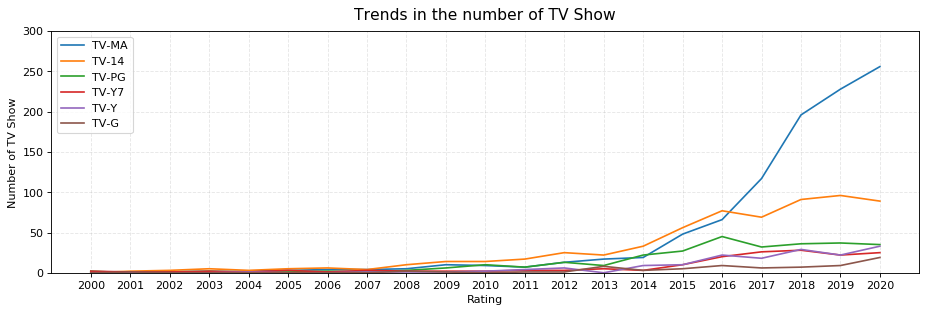

In [93]:
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.plot(t_tv.index, t_tv['TV-MA'], label='TV-MA')
ax.plot(t_tv.index, t_tv['TV-14'], label='TV-14')
ax.plot(t_tv.index, t_tv['TV-PG'], label='TV-PG')
ax.plot(t_tv.index, t_tv['TV-Y7'], label='TV-Y7')
ax.plot(t_tv.index, t_tv['TV-Y'], label='TV-Y')
ax.plot(t_tv.index, t_tv['TV-G'], label='TV-G')
ax.grid(alpha=0.3, ls='--')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend(loc='upper left')
ax.set_ylim(0,300)
ax.set_title('Trends in the number of TV Show', y=1.02, fontsize=14)
ax.set_xlabel('Rating')
ax.set_ylabel('Number of TV Show')
plt.show()

Similar to movies, before 2015, the production of TV shows was relatively low. However, in 2015 and 2016, there was a significant increase in production.

Starting from 2017, the production of TV-MA rated shows continued to increase. On the other hand, the production of TV-14 and TV-PG rated shows remained relatively stable.

Both TV-MA and TV-14 rated shows are higher in number compared to shows with other ratings.

<br>

## Analyze TV/MV released by Director

In [113]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas


**check for null value in director column**

In [115]:
df['director'].isnull().sum()

2318

In [134]:
table_tv['director'].isnull().sum()

2164

In [130]:
table_mv['director'].isnull().sum()

154

We will do analysis on MV as most of the director info on TVs are missing

<br>

**count number of directors**

In [138]:
table_mv['director'].nunique()

3677

In [152]:
director = table_mv['director'].value_counts().head(10)
director

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Robert Rodriguez           8
Hakan Algül                8
Kunle Afolayan             8
Shannon Hartman            8
Lance Bangs                8
Name: director, dtype: int64

In [153]:
pd.DataFrame({'directors':director.index, 'counts':director.values})

,directors,counts
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,15
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Jay Chapman,12
5,Robert Rodriguez,8
6,Hakan Algül,8
7,Kunle Afolayan,8
8,Shannon Hartman,8
9,Lance Bangs,8


<br>

## Analyze Film Duration


**cleanse any null data**

In [49]:
data = table_mv.loc[table_mv['director'].notnull()].reset_index()
data.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,categories
0,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas
1,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror
2,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action
3,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
4,6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,Horror


In [50]:
data.shape

(5214, 12)

**convert the duration column to 32int**

In [48]:
data = data.convert_dtypes()

In [209]:
l = []
for x in (np.arange(0,4809)):
    l.append(data['duration'][x].replace(' min',''))

In [211]:
data['duration'] = l

In [217]:
data['duration'] = data['duration'].astype('int32')

**Distribution of Movie Duration**

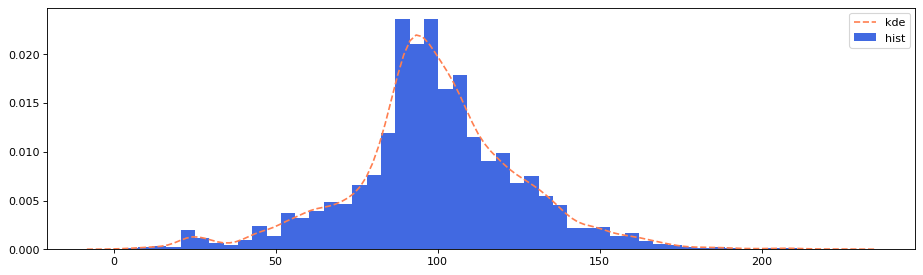

In [253]:
fig,ax=plt.subplots(figsize=(14,4), dpi=80)
ax.hist(data['duration'], bins=50, density=True, color='royalblue', label='hist')
sns.kdeplot(data['duration'], color='coral', ls='--', label='kde')
plt.show()

<br>

## Categoreies Analysis

**counts per category**

In [260]:
tv_count = table_tv['categories'].value_counts()
tv_count = pd.DataFrame({'Categories':tv_count.index, 'Counts':tv_count.values})
tv_count

,Categories,Counts
0,International,686
1,Crime,366
2,Kids,343
3,British,227
4,TV,219
5,Docuseries,187
6,Anime,141
7,Reality,99
8,Stand-Up,32
9,Romantic,28


**making pivot tables**

In [273]:
m = table_tv.groupby(['categories', 'release_year']).size()
m

categories  release_year
Anime       2000             1
            2001             1
            2002             1
            2003             1
            2005             1
                            ..
TV          2016            10
            2017            28
            2018            27
            2019            62
            2020            54
Length: 164, dtype: int64

In [276]:
m = pd.DataFrame(m).rename(columns={0:'count'})
m

count
categories release_year       
Anime      2000              1
           2001              1
           2002              1
           2003              1
           2005              1
...                        ...
TV         2016             10
           2017             28
           2018             27
           2019             62
           2020             54

[164 rows x 1 columns]

In [281]:
m = pd.pivot_table(m, index=['release_year'], columns=['categories']).fillna(0)['count'].astype('int32')
m

categories,Anime,British,Classic,Crime,Docuseries,International,Kids,Reality,Romantic,Spanish-Language,Stand-Up,TV
release_year,,,,,,,,,,,,
2000,1,0,0,0,0,0,1,0,0,0,0,2
2001,1,2,0,0,0,0,1,0,0,0,0,0
2002,1,0,0,0,0,3,1,0,1,0,0,0
2003,1,0,2,0,0,4,1,0,0,0,0,1
2004,0,1,1,1,0,4,2,0,0,0,0,0
2005,1,2,0,0,0,3,3,0,0,0,0,3
2006,3,3,1,0,0,1,1,1,1,0,0,2
2007,1,0,1,1,2,1,3,0,0,0,1,3
2008,7,2,1,3,0,5,4,0,1,0,0,0


**TV Show Release Trend by Ratings**

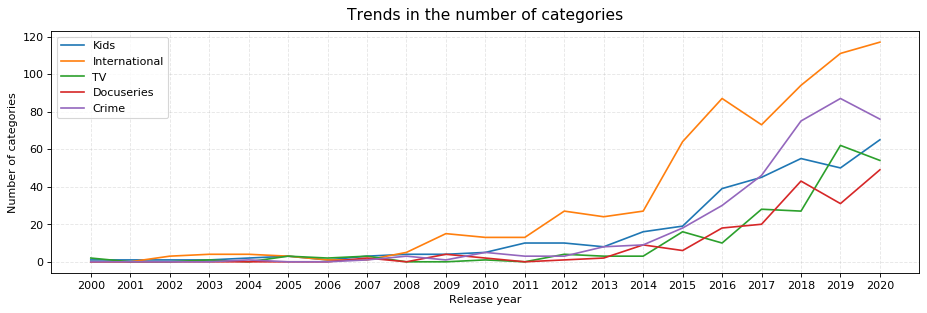

In [311]:
fig,ax=plt.subplots(figsize=(14,4),dpi=80)
ax.plot(m.index, m['Kids'], label='Kids')
ax.plot(m.index, m['International'], label='International')
ax.plot(m.index, m['TV'], label='TV')
ax.plot(m.index, m['Docuseries'], label='Docuseries')
ax.plot(m.index, m['Crime'], label='Crime')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend()
ax.set_title('Trends in the number of categories', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of categories')
ax.grid(alpha=0.3, ls='--')
plt.show()

International、Kids、Crime types experienced the fastest growth over the past 20 years.

<br>

**Distribution of Movies by Categories**

In [261]:
mv_count = table_mv['categories'].value_counts()
mv_count = pd.DataFrame({'Categories':mv_count.index, 'Counts':mv_count.values})
mv_count

,Categories,Counts
0,Dramas,1303
1,Comedies,1000
2,Documentaries,735
3,Action,615
4,Children,476
5,Stand-Up,306
6,Horror,239
7,International,113
8,Movies,55
9,Thrillers,44


<br>

**Making pivot table on Movie data and visualizing the trend**

In [301]:
v = pd.DataFrame(table_mv.groupby(['categories', 'release_year']).size()).rename(columns={0:'count'})
v

count
categories release_year       
Action     2000              7
           2001              8
           2002             12
           2003             12
           2004             15
...                        ...
Thrillers  2016              6
           2017              8
           2018              7
           2019             10
           2020              3

[223 rows x 1 columns]

In [305]:
v = pd.pivot_table(v, index=['release_year'], columns=['categories']).fillna(0).astype('int32')['count']
v

categories,Action,Anime,Children,Classic,Comedies,Cult,Documentaries,Dramas,Horror,Independent,International,LGBTQ,Movies,Music,Romantic,Sci-Fi,Sports,Stand-Up,Thrillers
release_year,,,,,,,,,,,,,,,,,,,
2000,7,0,6,0,8,1,0,5,2,0,0,0,0,0,0,0,0,1,0
2001,8,0,4,0,11,0,0,7,0,0,0,0,0,0,0,0,0,1,1
2002,12,0,3,0,3,0,3,14,1,0,1,0,0,0,0,0,0,1,1
2003,12,0,6,0,10,0,0,8,4,0,0,0,0,0,0,0,0,0,0
2004,15,0,8,0,10,0,1,10,1,1,3,0,1,0,0,0,0,0,0
2005,12,0,6,0,18,0,4,15,2,1,1,0,1,0,0,0,0,1,0
2006,9,0,7,0,24,0,2,17,4,1,2,0,0,0,0,1,0,4,1
2007,14,0,9,0,18,1,4,22,2,0,0,0,0,0,0,0,0,1,1
2008,21,0,9,0,30,0,4,27,3,0,3,0,1,1,0,0,0,3,0


**Movie Released and Trend on Categories**

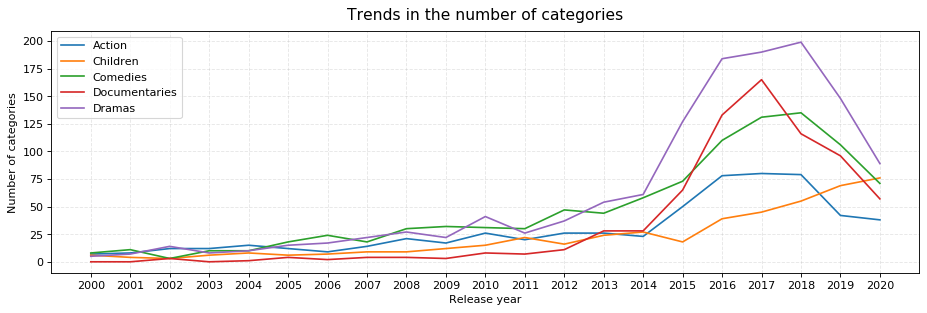

In [310]:
fig,ax=plt.subplots(figsize=(14,4),dpi=80)
ax.plot(v.index, v['Action'], label='Action')
ax.plot(v.index, v['Children'], label='Children')
ax.plot(v.index, v['Comedies'], label='Comedies')
ax.plot(v.index, v['Documentaries'], label='Documentaries')
ax.plot(v.index, v['Dramas'], label='Dramas')
ax.set_xticks(np.arange(2000,2021,1))
ax.legend()
ax.set_title('Trends in the number of categories', y=1.02, fontsize=14)
ax.set_xlabel('Release year')
ax.set_ylabel('Number of categories')
ax.grid(alpha=0.3, ls='--')
plt.show()